# Credit Card Fraud Using Logistic Regression

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import power_transform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score

from yellowbrick.classifier import DiscriminationThreshold

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe().astype("int")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,...,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807
mean,94813,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,88,0
std,47488,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,250,0
min,0,-56,-72,-48,-5,-113,-26,-43,-73,-13,...,-34,-10,-44,-2,-10,-2,-22,-15,0,0
25%,54201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
50%,84692,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22,0
75%,139320,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,77,0
max,172792,2,22,9,16,34,73,120,20,15,...,27,10,22,4,7,3,31,33,25691,1


In [5]:
df["Class"].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [6]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train = X_train.drop("Time", axis=1)
X_test = X_test.drop("Time", axis=1)

<AxesSubplot:xlabel='Amount'>

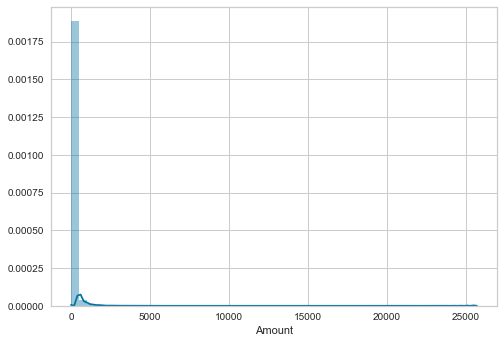

In [8]:
sns.distplot(X_train["Amount"])

In [9]:
X_train[["Amount"]] = power_transform(X_train[["Amount"]])

<AxesSubplot:xlabel='Amount'>

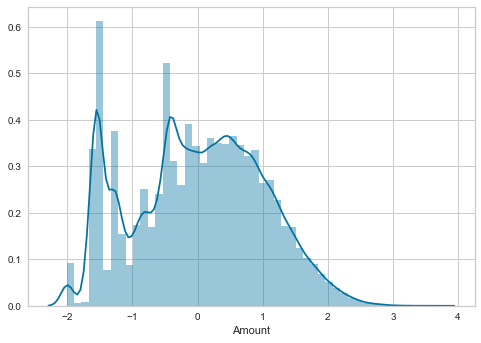

In [10]:
sns.distplot(X_train["Amount"])

In [11]:
X_train["Class"] = y_train
X_train["Class"].value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [12]:
X_train.sample(frac=1, random_state=42) # shuffle dataset
X_train_false = X_train[X_train["Class"] == 0].sample(n=356, random_state=42) # select first 356 samples
X_train_true = X_train[X_train["Class"] == 1]

X_train  = pd.concat([X_train_true, X_train_false])
X_train = X_train.sample(frac=1, random_state=42) # shuffle
y_train = X_train["Class"] # assign target variable (after undersampling) back to y_train
X_train = X_train.drop("Class", axis=1)

In [13]:
clf = LogisticRegression(penalty="l2", random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

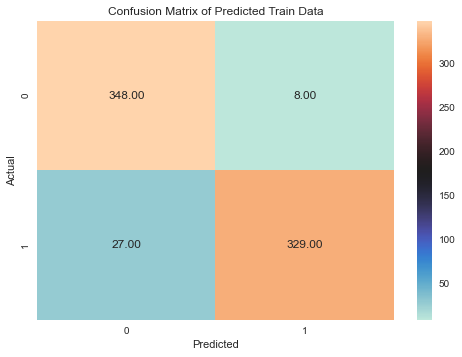

In [14]:
sns.heatmap(confusion_matrix(y_true = y_train, y_pred = clf.predict(X_train)), cmap="icefire", annot=True, fmt=".2f");
plt.title("Confusion Matrix of Predicted Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual");

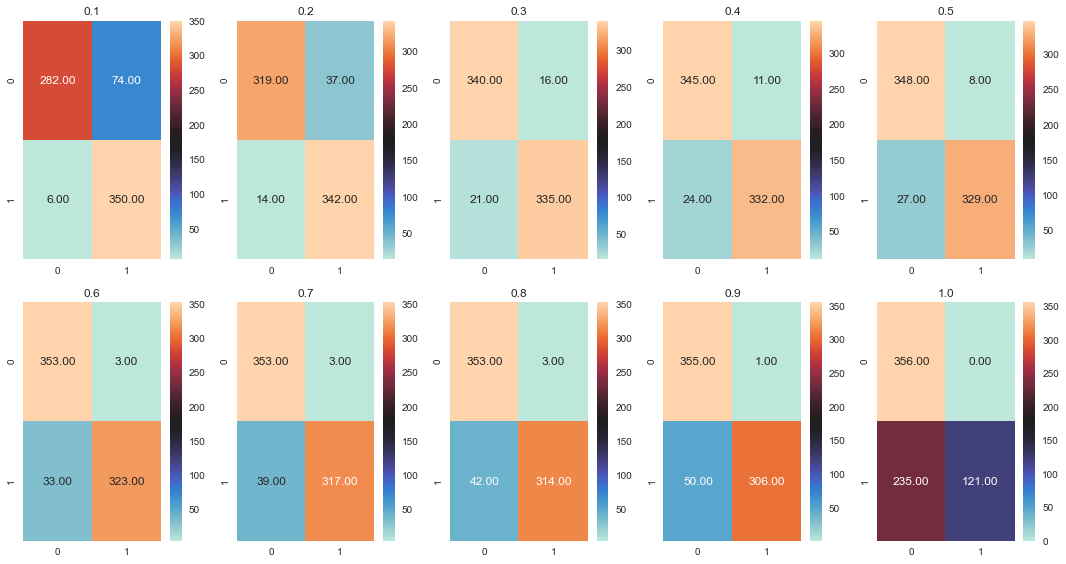

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
ax = ax.flatten()
threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
axes = 0

for i in threshold:
    X_train_prob = clf.predict_proba(X_train)
    y_pred = X_train_prob[:,1] # index probability of fraud
    y_pred[y_pred >= i] = 1
    y_pred[y_pred < i] = 0
    ax[axes] = sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap="icefire", fmt=".2f", ax=ax[axes]);
    ax[axes].set_title(f"{round(i, 2)}")
    axes += 1

plt.tight_layout()

In [16]:
threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for i in threshold:
    X_train_prob = clf.predict_proba(X_train)
    y_pred = X_train_prob[:,1] # index probability of fraud
    y_pred[y_pred >= i] = 1
    y_pred[y_pred < i] = 0
    print(f"========== Classification Report with Threshold as {round(i, 2)} ==========\n")
    print(f"\t\t\tAccuracy: {round(accuracy_score(y_train, y_pred), 2)}")
    print(f"\t\t\tPrecision: {round(precision_score(y_train, y_pred), 2)}")
    print(f"\t\t\tRecall: {round(recall_score(y_train, y_pred), 2)}")
    print(f"\t\t\tF1: {round(f1_score(y_train, y_pred), 2)}")
    print("\n")

========== Classification Report with Threshold as 0.1 ==========

			Accuracy: 0.89
			Precision: 0.83
			Recall: 0.98
			F1: 0.9


========== Classification Report with Threshold as 0.2 ==========

			Accuracy: 0.93
			Precision: 0.9
			Recall: 0.96
			F1: 0.93


========== Classification Report with Threshold as 0.3 ==========

			Accuracy: 0.95
			Precision: 0.95
			Recall: 0.94
			F1: 0.95


========== Classification Report with Threshold as 0.4 ==========

			Accuracy: 0.95
			Precision: 0.97
			Recall: 0.93
			F1: 0.95


========== Classification Report with Threshold as 0.5 ==========

			Accuracy: 0.95
			Precision: 0.98
			Recall: 0.92
			F1: 0.95


========== Classification Report with Threshold as 0.6 ==========

			Accuracy: 0.95
			Precision: 0.99
			Recall: 0.91
			F1: 0.95


========== Classification Report with Threshold as 0.7 ==========

			Accuracy: 0.94
			Precision: 0.99
			Recall: 0.89
			F1: 0.94


========== Classification Report with Threshold as 0.8 =========

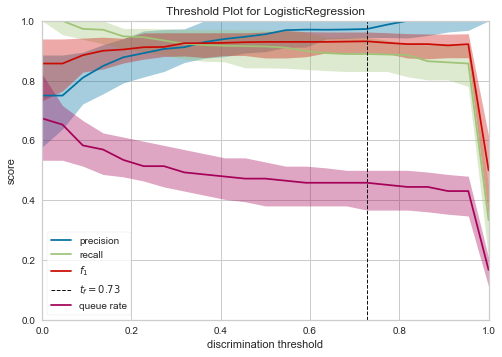

In [17]:
visualizer = DiscriminationThreshold(clf, random_state=42)
visualizer.fit(X_train, y_train)
visualizer.show();

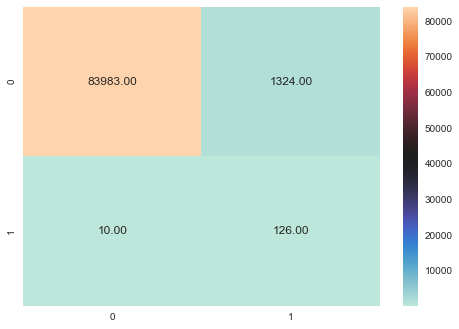

In [18]:
X_test["Amount"] = power_transform(X_test[["Amount"]])[:,0]
X_test_prob = clf.predict_proba(X_test)
y_pred = X_test_prob[:,1] # index probability of fraud
y_pred[y_pred >= 0.73] = 1
y_pred[y_pred < 0.73] = 0

sns.heatmap(confusion_matrix(y_test, y_pred), cmap="icefire", annot=True, fmt=".2f");

In [19]:
accuracy_score(y_test, y_pred)

0.9843872523202603